# Resize Dataset Images and Annotations
This ipynb was created to assist in resizing images and annotations as needed. Sometimes models require that all images have a standard size.

## Set Up

In [5]:
from google.colab import drive

drive.mount("/content/drive")

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Specify the path to the repository location in your Google Drive
REPO_LOC = "/content/drive/MyDrive/Projects/Capsulorrhexis_Automated_Surgical_Feedback/rhexis-trajectory"

# Specify the path to the Trajectory Classification Dataset
DATA_LOC = "/content/drive/MyDrive/Projects/Capsulorrhexis_Automated_Surgical_Feedback/CapsulorrhexisTrajectoryProject_PublicallyShared/datasets/KeypointDetectionDataset_RandomAnnotatedImages_N1000"


import sys
sys.path.insert(0, f"{REPO_LOC}")

In [21]:
# Imports
import rhexis_utils.edit_dataset_utils as edu
import rhexis_utils.annotation_display_utils as adu
from rhexis_utils.general_utils import print_dict_list

New data location: where all the images and new jsons will be saved

In [14]:
STANDARD_SIZE = (720, 480)

NEW_DATA_LOC = DATA_LOC + f"_RESIZED_{STANDARD_SIZE[0]}_{STANDARD_SIZE[1]}"

Subdirectory Names: Names of the dataset folder subdirectories that must be treated seperately

In [15]:
subdir_names = ["train_set", "test_set", "val_set"]

# Resize Images

In [16]:
stack_list, img_data_list = edu.read_in_all_images(DATA_LOC, STANDARD_SIZE, subdir_names)

Loading in and resizing images from {name}:
800 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (800, 480, 720, 3)
Loading in and resizing images from {name}:
100 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (100, 480, 720, 3)
Loading in and resizing images from {name}:
100 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (100, 480, 720, 3)


In [18]:
edu.create_resized_images_all_subdir(stack_list, img_data_list, NEW_DATA_LOC, subdir_names)


Successfully saved 800 resized images for train_set


Successfully saved 100 resized images for test_set


Successfully saved 100 resized images for val_set



# Rescale JSON files

In [19]:
json_dict_list = edu.correct_all_json_files(
    STANDARD_SIZE, DATA_LOC, NEW_DATA_LOC, img_data_list, subdir_names
)

In [20]:
print_dict_list(json_dict_list)

licenses
[{'name': '', 'id': 0, 'url': ''}]

info
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}

categories
[{'id': 1, 'name': 'utrada tip', 'supercategory': '', 'keypoints': [], 'skeleton': []}]

images
[{'id': 1, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_895.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 2, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_754.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 3, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_728.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 4, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_726.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 5, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_655.jpg', 'license': 0, 'flickr_url': '', 'coco_

# Tests to make sure bbox and keypoints are correct

ORIGINAL IMAGE
/content/drive/MyDrive/Projects/Capsulorrhexis_Automated_Surgical_Feedback/CapsulorrhexisTrajectoryProject_PublicallyShared/datasets/KeypointDetectionDataset_RandomAnnotatedImages_N1000/train_set/images/Medi_09.22.20_1_rhexis_622.jpg
Image ID: 6
=JSON_DATA=
images
{'id': 6, 'width': 712, 'height': 478, 'file_name': 'Medi_09.22.20_1_rhexis_622.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annotations
{'id': 6, 'image_id': 6, 'category_id': 1, 'segmentation': [], 'area': 15034.9689, 'bbox': [546.26, 309.75, 89.67, 167.67], 'iscrowd': 0, 'attributes': {'occluded': False}, 'num_keypoints': 2, 'keypoints': [566.22, 323.62, 2, 566.22, 323.62, 2]}
bbox: [546.26, 309.75, 89.67, 167.67]
keypoints: [566.22, 323.62, 2, 566.22, 323.62, 2]
Predicted Keypoint 0: X 566, Y 324
Predicted Keypoint 1: X 566, Y 324
Image size:(478, 712, 3)


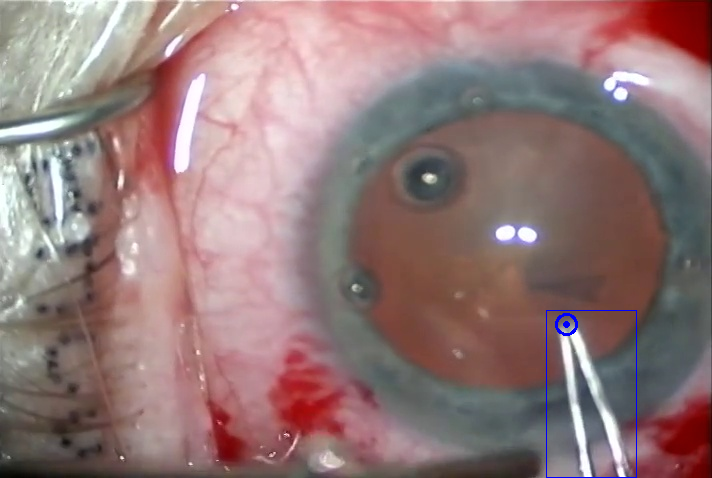

RESIZED IMAGE
/content/drive/MyDrive/Projects/Capsulorrhexis_Automated_Surgical_Feedback/CapsulorrhexisTrajectoryProject_PublicallyShared/datasets/KeypointDetectionDataset_RandomAnnotatedImages_N1000_RESIZED_720_480/train_set/images/Medi_09.22.20_1_rhexis_622.jpg
Image ID: 6
=JSON_DATA=
images
{'id': 6, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_622.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annotations
{'id': 6, 'image_id': 6, 'category_id': 1, 'segmentation': [], 'area': 15267.9775, 'bbox': [548.55, 313.23, 90.05, 169.55], 'iscrowd': 0, 'attributes': {'occluded': False}, 'num_keypoints': 2, 'keypoints': [568.59, 327.26, 2, 568.59, 327.26, 2]}
bbox: [548.55, 313.23, 90.05, 169.55]
keypoints: [568.59, 327.26, 2, 568.59, 327.26, 2]
Predicted Keypoint 0: X 569, Y 327
Predicted Keypoint 1: X 569, Y 327
Image size:(480, 720, 3)


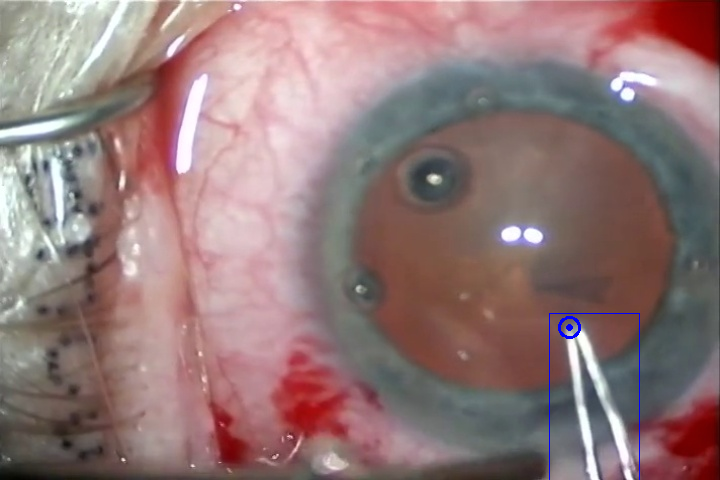

In [23]:
test_subdir = "train_set"
test_index = 5

adu.display_resized_annotation(test_subdir, test_index, DATA_LOC, NEW_DATA_LOC)